# Properati data analysis and price prediction
This project focuses on analyzing and predicting property values in Ciudad Autonoma de Buenos Aires. It also includes exploratory data analysis, which involves visualizing and interpreting various relationships between selected features. The dataset used in this project includes various attributes such as the property's location, size, number of rooms, amenities, and price.

In [98]:
# import libraries to be used
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

The first step of the project is to clean and filter the data, removing any duplicates and non-relevant information. Then, exploratory data analysis is conducted to gain insights into the data, such as the distribution of prices, property types, and locations.

In [99]:
# The dataset is loaded and its first rows are displayed to view its content.
properati = pd.read_csv("datosProperati.csv")
properati.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,DyVXfkpKygVBKuUk5olH+A==,Propiedad,2020-08-22,2020-09-03,2020-08-22,-34.407468,-58.957367,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,NaN,NaN,NaN,133139.0,NaN,NaN,NaN,Mensual,VENTA - Lote Industrial 130.000m2 - Parque Ind...,Lote (Nro.50) mide 133.139 m2\n<br>Valor: U$S ...,Lote,Venta
1,9naojilaMecJN4jlQiTkGg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-37.996039,-57.542509,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,NaN,NaN,NaN,8.0,NaN,NaN,687.0,687.0,NaN,NaN,Mensual,Casa - Santa Cecilia,Conjunto edilicio de casa y departamentos en b...,Otro,Venta
2,tlCPRJPjoDEUzuuCelemAQ==,Propiedad,2020-08-22,2020-08-31,2020-08-22,-31.380187,-58.009182,Argentina,Entre Ríos,Concordia,NaN,NaN,NaN,2.0,1.0,1.0,80.0,80.0,NaN,NaN,Mensual,Casa - Concordia,"Casa de un dormitorio, cocina, baño, living co...",Casa,Alquiler
3,Zw3b91glQUO3HNrM5fPYlQ==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-27.494106,-55.123455,Argentina,Misiones,Oberá,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,Mensual,Terreno - Obera,IMPORTANTE PROPIEDAD EN VENTA EN OBERA MISIONE...,Lote,Venta
4,bsU81gm9JEgtZCbTYgvykg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-32.948856,-60.630464,Argentina,Santa Fe,Rosario,NaN,NaN,NaN,3.0,1.0,1.0,76.0,66.0,NaN,NaN,Mensual,Departamento - Rosario,PORTAL DE LOS MARINOS<br>Es un complejo de viv...,Departamento,Venta


In [100]:
# all values listed in the l2 column are displayed
print('PAIS:', properati['l2'].unique())

PAIS: ['Bs.As. G.B.A. Zona Norte' 'Buenos Aires Costa Atlántica' 'Entre Ríos'
 'Misiones' 'Santa Fe' 'Bs.As. G.B.A. Zona Oeste' 'Tucumán' 'Chubut'
 'Capital Federal' 'Córdoba' 'Buenos Aires Interior'
 'Bs.As. G.B.A. Zona Sur' 'Canelones' 'San Luis' 'Neuquén' 'Colonia'
 'Maldonado' 'Río Negro' 'Montevideo' 'Mendoza' 'Corrientes' 'Salta'
 'La Pampa' 'Florida' 'Tierra Del Fuego' 'Chaco' 'Santa Cruz' 'Catamarca'
 'San Juan' 'Santiago Del Estero' 'Miami' 'Jujuy' 'Michigan' 'São Paulo'
 'La Rioja' 'Rocha' 'Santa Catarina' 'Pennsylvania' 'Formosa'
 'Rio Grande do Norte' 'Maryland' 'Rio de Janeiro' 'California']


   The dataset used for this project contains information about properties not only in Ciudad Autonoma de Buenos Aires (CABA), but also in other regions. So properties from are filtered using the l2 column to exclude rows of non-CABA locations.
   It has been noticed that the columns 'start_date' and 'created_on' appeared to contain identical information. To avoid redundancy in our dataset, the information is verified to confirm or not if it is repeated in both columns to then keep only one of them in our analysis if confirmed.
   Additionally, it is also noticed that if the ad_type column only listed value is "Propiedad" then that column is disposable since it adds no value to this analysis.

In [101]:
#function that checks if start_date and created_on contain the same info
print(properati['start_date'].equals(properati['created_on'])) # == True

#Check if ad_type column can be dropped
print(properati['ad_type'].unique())  # "Propiedad" is indeed the only posible value
properati.drop('ad_type', inplace=True, axis=1)

#Since both contain the same information, created_on is eliminated
properati.drop('created_on', inplace=True, axis=1)

#All properties outside of CABA are eliminated
properati = properati[properati.l2 == 'Capital Federal']
properati.shape

True
['Propiedad']


(265125, 23)

 By removing duplicates, the results are not skewed by repeated or redundant data points and checks that every row contributes unique information to our analysis. Those are the ones that have the same coordinates,location, description, property type and price.

In [102]:
duplicates = properati.duplicated(subset=['lat','lon','description',"price",'property_type','l3'])
print("Number of duplicated rows:", duplicates.sum())

properati2 = properati.drop_duplicates(subset=['lat','lon','description',"price",'property_type','l3'],keep="first")

Number of duplicated rows: 40185


Now it is time to analyse most of the remaining columns of the dataset.


In [103]:
properati2.head()

,id,start_date,end_date,lat,lon,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
16,LrDZTDP9vyylLQ3SmazY1A==,2020-08-22,2020-09-04,-34.633053,-58.419906,Argentina,Capital Federal,Boedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,520.0,70000.0,ARS,Mensual,Depósito con Oficina en Boedo,Depósito con amplias y cómodas oficinas y c...,Oficina,Alquiler
19,hbIvfOetTyeiCcFPM4FATA==,2020-08-22,2020-09-04,-34.598112,-58.400784,Argentina,Capital Federal,Recoleta,NaN,NaN,NaN,NaN,NaN,3.0,265.0,265.0,65000.0,ARS,Mensual,Oficina comercial · 265m² · 2 Cochera,Gran Oportunidad! Unica piso de oficinas de 26...,Oficina,Alquiler
20,srXXAu7Fb8/Kng0/cxUe7g==,2020-08-22,2020-09-04,-34.604054,-58.393770,Argentina,Capital Federal,Balvanera,NaN,NaN,NaN,NaN,NaN,1.0,80.0,80.0,60000.0,ARS,Mensual,Oficina - Balvanera | Vista al pasaje Discépolo,"Edificio de oficinas desarrollado en Subsuelo,...",Oficina,Alquiler
21,M/gJEWU1uDbLN/bJfEdVCg==,2020-08-22,2020-09-04,-34.604054,-58.393770,Argentina,Capital Federal,Balvanera,NaN,NaN,NaN,NaN,NaN,1.0,50.0,50.0,38888.0,ARS,Mensual,Oficina - Balvanera | Vista al pasaje Discépolo,"Edificio de oficinas desarrollado en Subsuelo,...",Oficina,Alquiler
22,dxnWsE9Rrk/ehENKrTbE/Q==,2020-08-22,2020-09-04,-34.599676,-58.371434,Argentina,Capital Federal,San Nicolás,NaN,NaN,NaN,NaN,NaN,1.0,80.0,80.0,20000.0,ARS,Mensual,Oficina muy luminosa esquina Cordoba con vista...,Oficina muy luminosa esquina Cordoba con vista...,Oficina,Alquiler


-  id : contains the id of the property.
- end_date : this column could be the one that informs the date of end of the advertisement on the website, since the property was rented, bought or the owner/ real state agency decided to pause the publication.
- lat and lon : give geographical information of the property, both being coordinates to its aproximate or real location.
- l1 : lists geographical information indicating the country in which the property is located.
- l2 : lists geographical information indicating the province/region in which the property is located.
- l3 : lists geographical information indicating the neighborhood in which the property is located.
- rooms : this column is where the number of rooms is informed.
- bedrooms : this column is where the number of bedrooms is informed.
- bathrooms : this column is where the number of bathrooms is informed.
- surface_total : lists the area in square meters of the whole property.
- surface_covered : lists the area in square meters of only the covered areas of the property.
- price : price of the property
- currency : currency in which the price of the property is listed.
- title : title of the listing of the property.
- description : description of the property

After looking at what is the content of each of the columns, the number of publications for each property type is plotted.

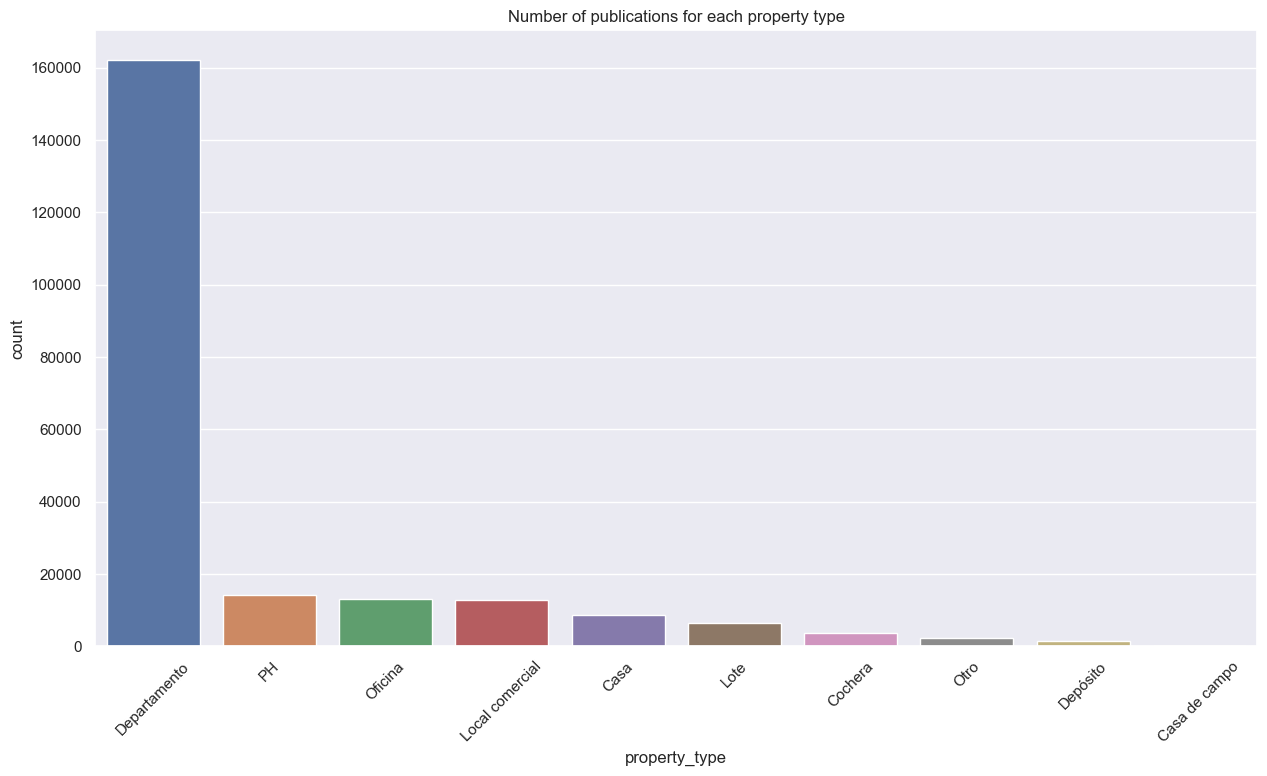

In [104]:
plt.rcParams['figure.figsize'] = (15,8)
chart = sns.countplot(x='property_type',data=properati2, order = properati2['property_type'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
chart.set_title("Number of publications for each property type")
plt.show()

It can be easily seen thet apartments are the most common type of property advertised with all the other property types listed having less than a quarter publications compared to apartments.
This is now continued with the analysis of the property_tipe and operation type columns.

In [105]:
print("Unique values of the property_type column:")
print(properati2['property_type'].unique())
#properties that are not appartments or houses are filtered and a separate db is created for offices and shops.

properatiHousing = properati2[properati2.property_type.isin(['Departamento', 'Casa', 'PH'])].copy(deep=True)


print("Unique values of the operation_type column:")
print(properati2['operation_type'].unique())

Unique values of the property_type column:
['Oficina' 'Departamento' 'Local comercial' 'Lote' 'Cochera' 'PH' 'Casa'
 'Otro' 'Depósito' 'Casa de campo']
Unique values of the operation_type column:
['Alquiler' 'Alquiler temporal' 'Venta']


property_type : informs if the property is a house, office, parking lot or another type of building/terrain
operation_type : informs if the property advertised is for sale or rent.

Finally, the price_period column is analysed .

In [106]:
print("Unique values of the price_period column:")
print(properatiHousing['price_period'].unique())

Unique values of the price_period column:
['Mensual' nan 'Semanal']


Another piece of information that can be of interest is the comparison of the volume of each operation type.

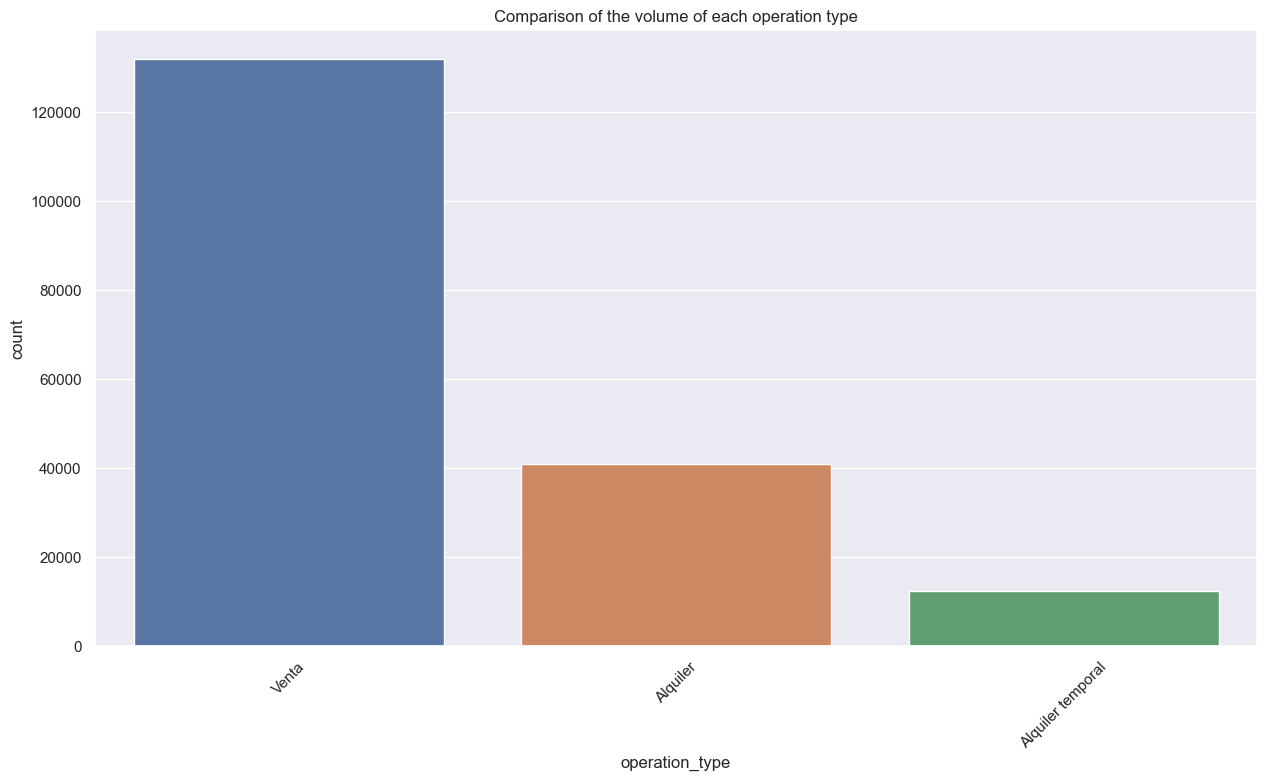

In [107]:
plt.rcParams['figure.figsize'] = (15,8)
chart = sns.countplot(x='operation_type',data=properatiHousing, order = properatiHousing['operation_type'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
chart.set_title("Comparison of the volume of each operation type")
plt.show()

The graph clearly shows how selling is the most popular operation type followed by renting with less than half thr number of publications.

## Missing values

Any property listed without total surface covered, price or currency will be considered of no interest since it lacks important pieces of information.

In [108]:
properatiHousing = properatiHousing.dropna(subset = ['currency','price','surface_total'])

#check how many columns and rows still remain in the dataset
print(properatiHousing.shape) #(129379, 23)

(129379, 23)


In [109]:
properatiHousing.head(5)

,id,start_date,end_date,lat,lon,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
27,3xIPcyYT3dxzTQSJ0mVh8A==,2020-08-22,2020-09-04,-34.616430,-58.414393,Argentina,Capital Federal,Almagro,NaN,NaN,NaN,1.0,NaN,1.0,42.0,28.0,20000.0,ARS,Mensual,Alquiler - Monoambiente con Patio. Súper Lumi...,Hermoso Monoambiente en Almagro! Muy bien ubic...,Departamento,Alquiler
28,zV3vsTl4h+23V06ipCgEwQ==,2020-08-22,2020-09-04,-34.579864,-58.415590,Argentina,Capital Federal,Palermo,NaN,NaN,NaN,1.0,NaN,1.0,31.0,31.0,16000.0,ARS,Mensual,República de la India 2800 - Monoambiente apto...,Excelente monoambiente apto profesional - Se e...,Departamento,Alquiler
31,gPBMJG7heEMEJqcUITZunw==,2020-08-22,2020-09-04,NaN,NaN,Argentina,Capital Federal,Belgrano,NaN,NaN,NaN,1.0,NaN,1.0,26.0,26.0,19000.0,ARS,Mensual,Departamento - Belgrano,Depto de 1 ambiente al frente<br>26m2 con Balc...,Departamento,Alquiler
32,kzGB8OZT/FxKvdwQNIxOGw==,2020-08-22,2020-09-04,NaN,NaN,Argentina,Capital Federal,Belgrano,NaN,NaN,NaN,1.0,NaN,1.0,37.0,34.0,26000.0,ARS,Mensual,Departamento - Belgrano,Depto de 1 ambiente con mueble divisorio.<br>E...,Departamento,Alquiler
34,Xk5NrXofxWmaDDPcri/2Hg==,2020-08-22,2020-08-26,-34.623793,-58.402256,Argentina,Capital Federal,San Cristobal,NaN,NaN,NaN,1.0,NaN,1.0,40.0,NaN,15000.0,ARS,Mensual,HUMBERTO 1º AL 2400 - San Cristobal,MONOAMBIENTE. FRENTE. 40 M2. IMPECABLE. GRAN B...,Departamento,Alquiler


Now the dataset consists of 23 columns and 129379 rows.
Fixing the currency of the publication to USD, it is key to compare the volume of each possible operation type to gain valuable insight into the behavior of the real estate market in terms of the volume of operations.

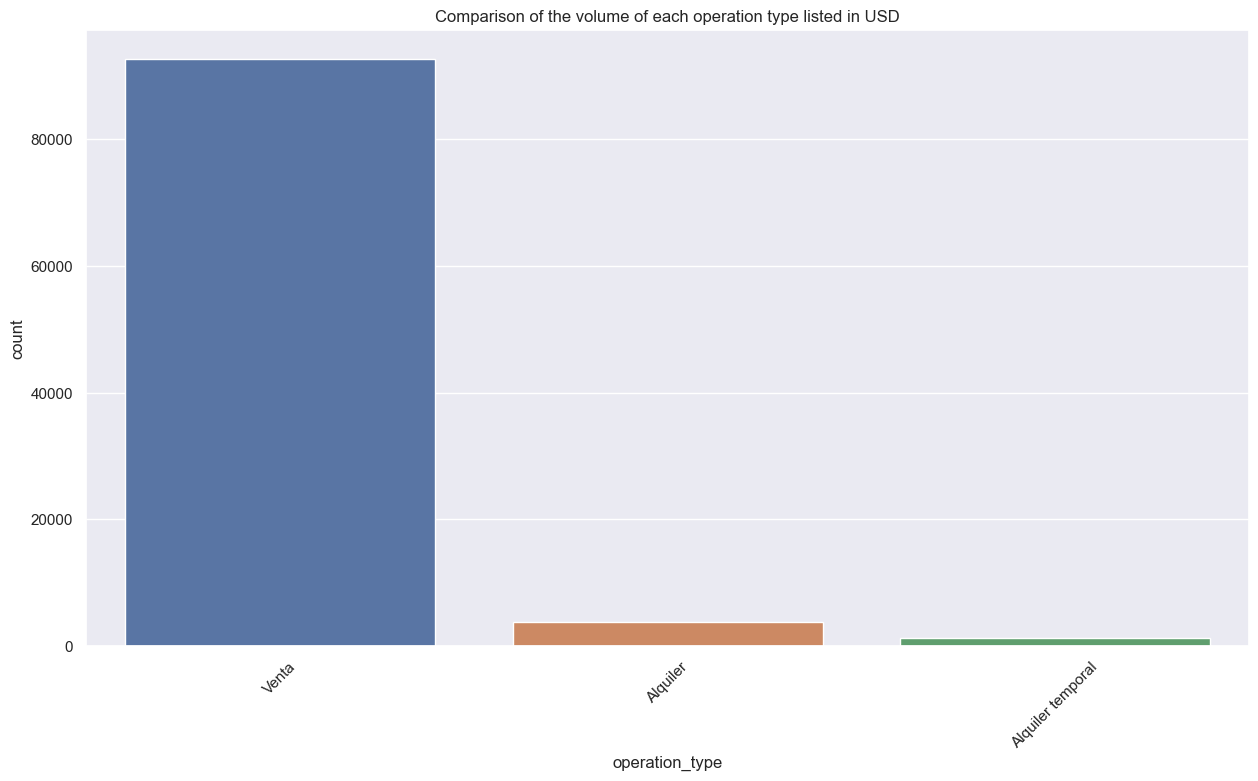

In [110]:
properatiUSD = properatiHousing[properatiHousing.currency =='USD']

plt.rcParams['figure.figsize'] = (15,8)
chart = sns.countplot(x='operation_type',data=properatiUSD)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
chart.set_title("Comparison of the volume of each operation type listed in USD")
plt.show()

The graph shows the volume of each type of operation in terms of USD. The x-axis represents the type of operation, and the y-axis represents the volume in USD. From the graph, we can see that the volume of properties for selling is the highest, followed by properties for renting and temporal rentals. This indicates that the real estate market is more active in terms of selling properties than renting or temporary rentals.
Moreover, we can see that the volume of properties for renting and temporary rentals is relatively similar, indicating that there is demand for both options. It is worth noting that the volume of temporary rentals may vary according to different seasons or events in the city.
To look at the price range of properties differentiated by each of the operations types another plot is created, with now the x-axis representing the price, and the y-axis representing the density.

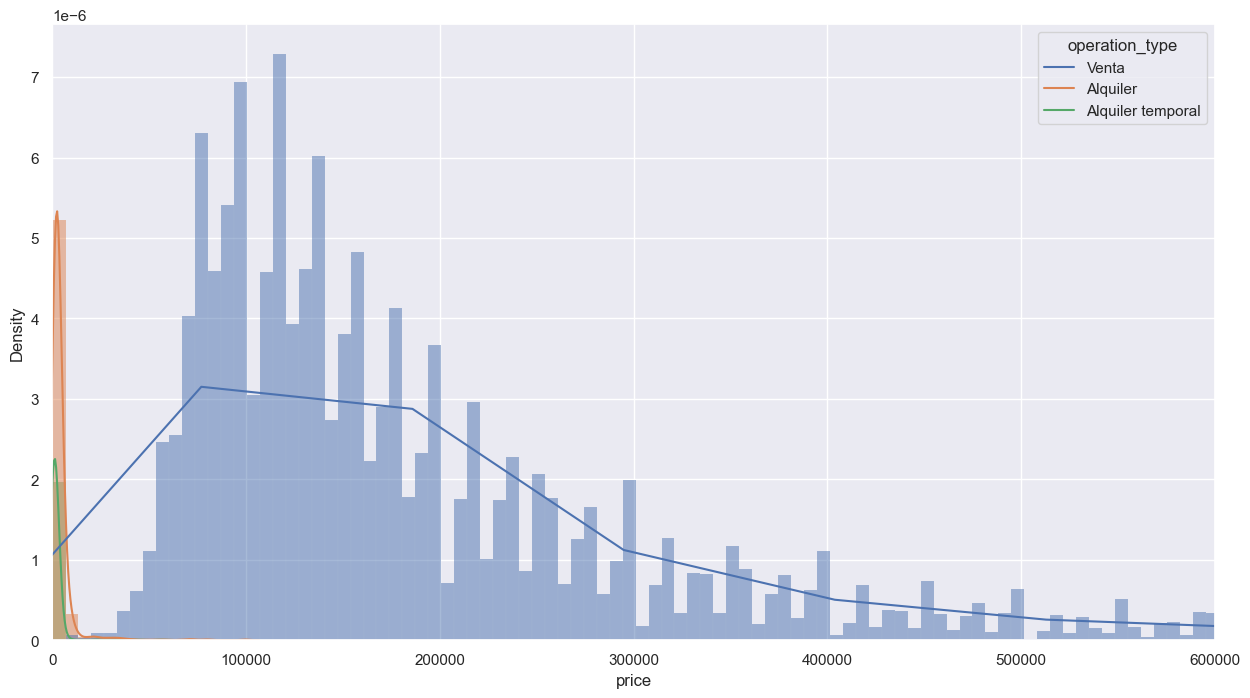

In [111]:
fig, ax = plt.subplots()
sns.histplot(data=properatiUSD, x='price', ax = ax, hue = 'operation_type',stat='density')
sns.kdeplot(data=properatiUSD, x="price", hue = 'operation_type',bw_adjust=1.5, ax=ax)
ax.set_xlim(0,600000)
plt.show()


The bars for properties being sold are taller and also indicate a higher price than those for renting or temporal rentals. It is also difficult to see any differences in the prices of renting and temporal rentals due to their relatively low prices compared to properties being sold.

## Pets and rented apartments

One of the questions to answer is the probability of an apartment for rental allowing pets. For this purpose the information of whether animals are permitted or not will be extracted from the description column, since none of the other columns inform about this matter.

In [112]:
properatiPets = properatiHousing.loc[(properatiHousing.operation_type =='Alquiler') & (properatiHousing.property_type == 'Departamento')].copy() # only apartments for rental are selected
properatiPets.head()


,id,start_date,end_date,lat,lon,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
27,3xIPcyYT3dxzTQSJ0mVh8A==,2020-08-22,2020-09-04,-34.616430,-58.414393,Argentina,Capital Federal,Almagro,NaN,NaN,NaN,1.0,NaN,1.0,42.0,28.0,20000.0,ARS,Mensual,Alquiler - Monoambiente con Patio. Súper Lumi...,Hermoso Monoambiente en Almagro! Muy bien ubic...,Departamento,Alquiler
28,zV3vsTl4h+23V06ipCgEwQ==,2020-08-22,2020-09-04,-34.579864,-58.415590,Argentina,Capital Federal,Palermo,NaN,NaN,NaN,1.0,NaN,1.0,31.0,31.0,16000.0,ARS,Mensual,República de la India 2800 - Monoambiente apto...,Excelente monoambiente apto profesional - Se e...,Departamento,Alquiler
31,gPBMJG7heEMEJqcUITZunw==,2020-08-22,2020-09-04,NaN,NaN,Argentina,Capital Federal,Belgrano,NaN,NaN,NaN,1.0,NaN,1.0,26.0,26.0,19000.0,ARS,Mensual,Departamento - Belgrano,Depto de 1 ambiente al frente<br>26m2 con Balc...,Departamento,Alquiler
32,kzGB8OZT/FxKvdwQNIxOGw==,2020-08-22,2020-09-04,NaN,NaN,Argentina,Capital Federal,Belgrano,NaN,NaN,NaN,1.0,NaN,1.0,37.0,34.0,26000.0,ARS,Mensual,Departamento - Belgrano,Depto de 1 ambiente con mueble divisorio.<br>E...,Departamento,Alquiler
34,Xk5NrXofxWmaDDPcri/2Hg==,2020-08-22,2020-08-26,-34.623793,-58.402256,Argentina,Capital Federal,San Cristobal,NaN,NaN,NaN,1.0,NaN,1.0,40.0,NaN,15000.0,ARS,Mensual,HUMBERTO 1º AL 2400 - San Cristobal,MONOAMBIENTE. FRENTE. 40 M2. IMPECABLE. GRAN B...,Departamento,Alquiler


In [113]:
contiene = properatiPets['description'].str.contains('apto mascotas|permite mascota|acepta mascota',case = False).copy()
noContiene = ~properatiPets["description"].str.contains('no apto mascotas|no permite mascota|no acepta mascota|no es apto mascotas|no se permite mascota|no se acepta mascota',case = False).copy()
infoPets = np.logical_and(contiene, noContiene)
infoPets = infoPets.map({True: 'Pet friendly', False: 'Not pet friendly'})
properatiPets['allows_pets'] = infoPets

With the previous code chunk the data of whether an apartment accepts furry companions or not is added to a column of a filtered properatyHousing copy. Now a density and bar plots are created to illustrate the acceptance of pets by rental price and the quantity of pet friendly apartments.

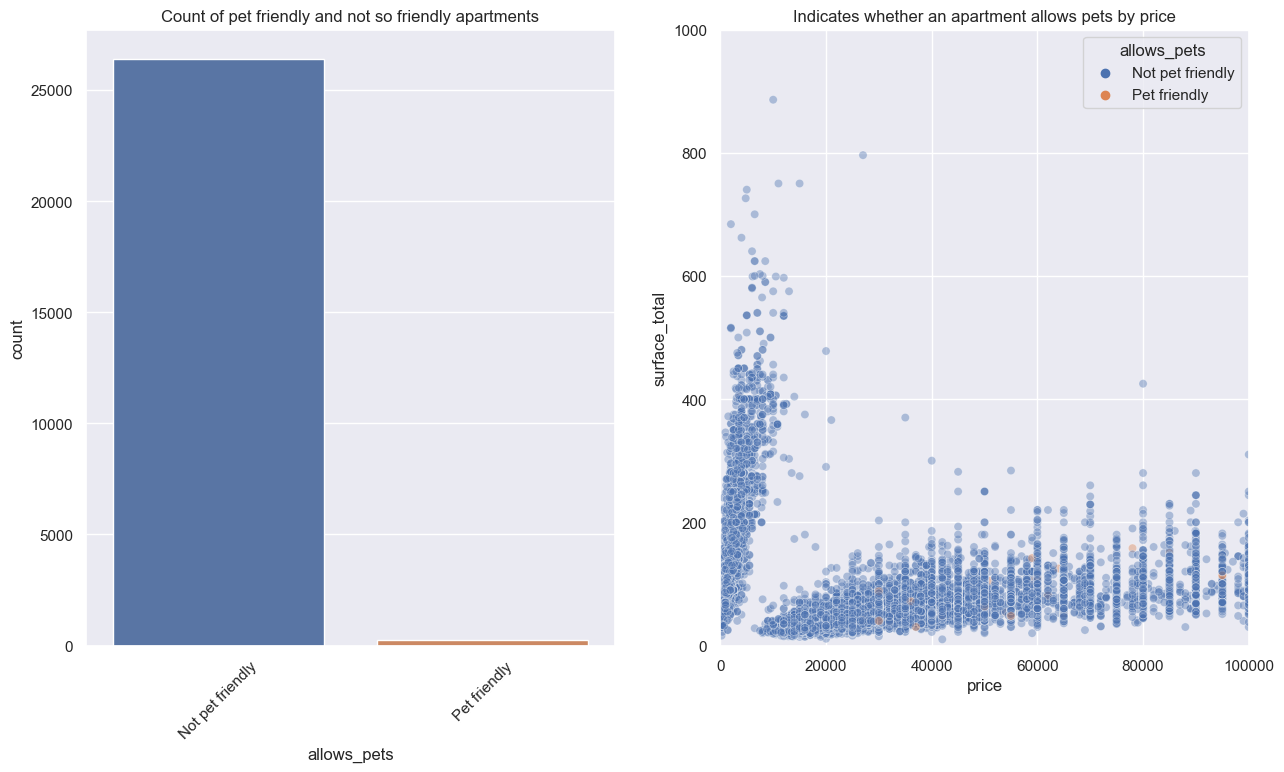

In [114]:
properatiPets = properatiPets.dropna(subset = ['allows_pets'])


fig, ax =plt.subplots(1,2)
chart = sns.countplot(x='allows_pets',data=properatiPets, ax = ax[0])
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
chart.set_title("Count of pet friendly and not so friendly apartments")
plt.title("Indicates whether an apartment allows pets by price")

sns.scatterplot(data=properatiPets, x='price', y ='surface_total', ax = ax[1], hue='allows_pets', alpha=0.4)
ax[1].set_xlim(0,100000)
ax[1].set_ylim(0,1000)
plt.show()

The bar plot indicates that most apartments specify that they are not pet friendly. This leaves the door open to reflect if owner or real state agencies are mostly prohibiting this or if when an apartment is pet friendly that information is generally omitted from the description.
The second plot does not bring new data to the table as the number of pet friendly apartments is so low that it is difficult to see any correlation with price or total surface.

## Selected amenities and apartments for sale

Following a similar approach to the one used for determining pet-friendliness, three new columns have been added to the database indicating the presence or absence of patio, balcony, and terrace amenities for each property listed for sale.


In [115]:
properatiSell = properatiHousing.loc[(properatiHousing.operation_type =='Venta') & (properatiHousing.currency == 'USD')].copy(deep=True)
properatiSell=properatiSell[properatiSell.surface_total >= properatiSell.surface_covered]
properatiSell=properatiSell[properatiSell['surface_total'] >= 10]
properatiSell=properatiSell[properatiSell['surface_total'] <= 300]

terraza = properatiSell['description'].str.contains('terraza',case = False)
patio =  properatiSell["description"].str.contains('patio|jardin|jardín',case = False) #also includes gardens
balcon = properatiSell["description"].str.contains('balcon|balcón',case = False)

properatiSell['terrace'] = terraza
properatiSell['patio'] = patio
properatiSell['balcony'] = balcon

properatiSell['start_date'] = pd.to_datetime(properatiSell['start_date'])
sortedPrice = properatiSell.sort_values('price')
df_grouped = sortedPrice.groupby('price')['property_type'].value_counts().to_frame()
df_grouped.columns = ['count']
df_grouped.reset_index(inplace=True)

Countplots are used to get visual information of how many properties include these amenities.

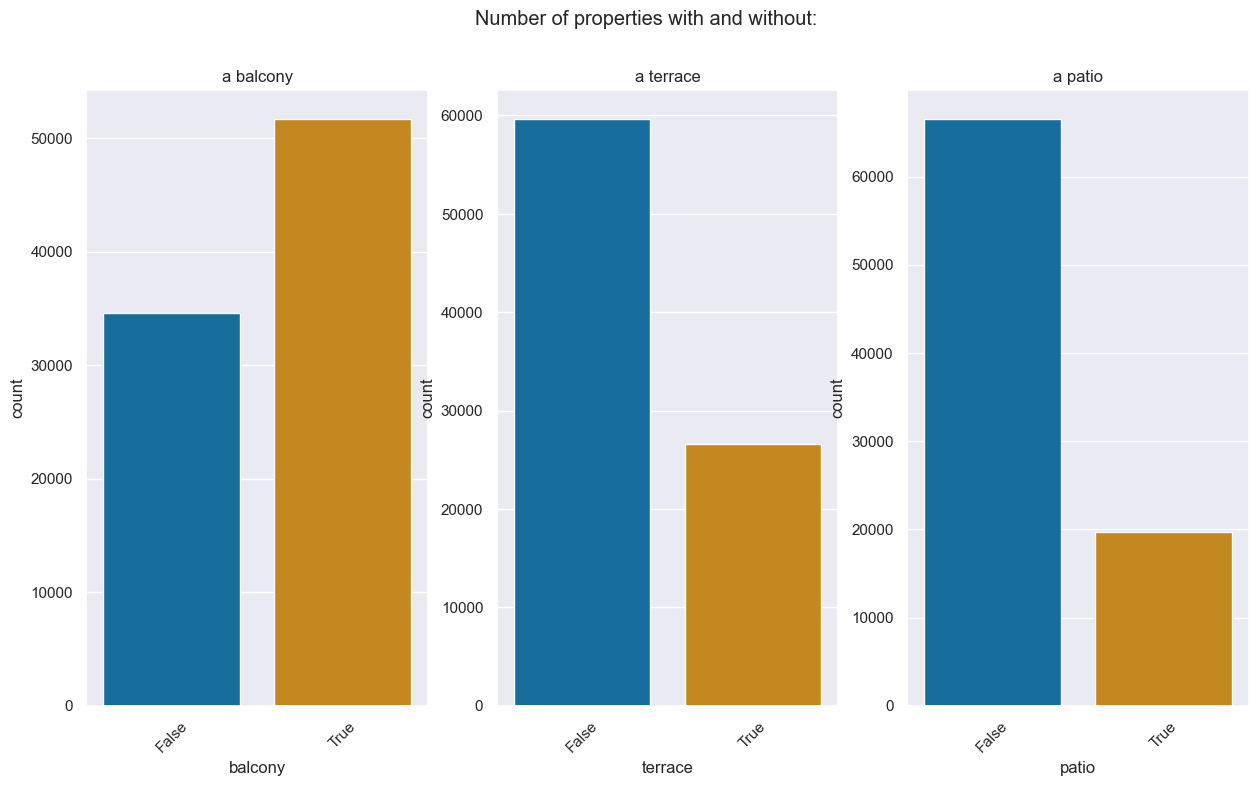

In [116]:
fig, ax = plt.subplots(1,3)
plt.suptitle('Number of properties with and without: ')
chart = sns.countplot(x='balcony',data=properatiSell, ax= ax[0], palette='colorblind')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
chart.set_title("a balcony")

chart2 = sns.countplot(x='terrace',data=properatiSell, ax= ax[1], palette='colorblind')
chart2.set_xticklabels(chart.get_xticklabels(),rotation=45)
chart2.set_title("a terrace")

chart3 = sns.countplot(x='patio',data=properatiSell, ax= ax[2], palette='colorblind')
chart3.set_xticklabels(chart.get_xticklabels(),rotation=45)
chart3.set_title("a patio")

plt.show()

It can be noted that most properties have a balcony, which can be caused by the great number of apartments for sale.

In [117]:
dep = properatiSell.loc[(properatiHousing.property_type == 'Departamento')].copy(deep=True)
dep['balcony'].sum()
print(dep.balcony.value_counts())

hous = properatiSell.loc[(properatiHousing.property_type == 'Casa')].copy(deep=True)
hous['balcony'].sum()
print(hous.balcony.value_counts())

True     48823
False    26729
Name: balcony, dtype: int64
False    2390
True      845
Name: balcony, dtype: int64


Now it can be said with certainty that the number of properties that have balconies is mainly influenced by the great volume of apartments on the market, being that the number of houses is lower and also have a tendency to not have a balcony.
In the case of patios and terraces, both turn ot to be more rare to find in a property. But in this case, it indeed is more common to find these amenities in houses than in apartments. The following two chunk of code indicates that patios are the norm for houses but rare for apartments and terraces are present in less that 50% of the houses but are still easier to find that in apartments.

In [118]:
#number of properties divided by type that have a patio

dep = properatiSell.loc[(properatiHousing.property_type == 'Departamento')].copy(deep=True)
dep['patio'].sum()
print(dep.patio.value_counts())

hous = properatiSell.loc[(properatiHousing.property_type == 'Casa')].copy(deep=True)
hous['patio'].sum()
print(hous.patio.value_counts())

False    62638
True     12914
Name: patio, dtype: int64
True     2318
False     917
Name: patio, dtype: int64


In [119]:
#number of properties divided by type that have a patio

dep = properatiSell.loc[(properatiHousing.property_type == 'Departamento')].copy(deep=True)
dep['terrace'].sum()
print(dep.terrace.value_counts())

hous = properatiSell.loc[(properatiHousing.property_type == 'Casa')].copy(deep=True)
hous['terrace'].sum()
print(hous.terrace.value_counts())

False    55068
True     20484
Name: terrace, dtype: int64
True     1891
False    1344
Name: terrace, dtype: int64


A scatterplot is created to see the relationship of price and the inclusion of the ammenities selected beforehand.

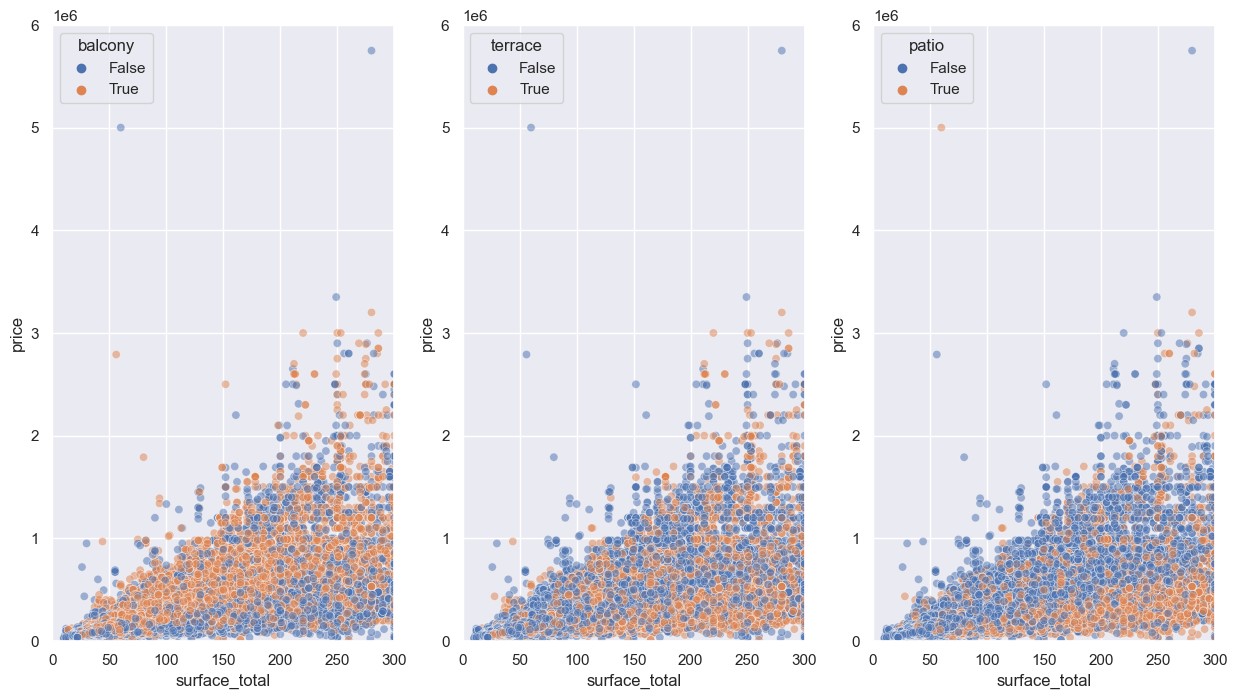

In [120]:
# Create scatter plot
fig, ax = plt.subplots(1,3)
sns.scatterplot(x='surface_total', y='price', hue='balcony',alpha=0.5, data=properatiSell, ax= ax[0])

sns.scatterplot(x='surface_total', y='price', hue='terrace',alpha=0.5, data=properatiSell, ax= ax[1])

sns.scatterplot(x='surface_total', y='price', hue='patio',alpha=0.5, data=properatiSell, ax= ax[2])


custom_xlim = (0, 300)
custom_ylim = (0, 6000000)

# Setting the values for all axes.
plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
plt.show()


In the left plot it can be seen that as the total surface and price increase also the number of properties that have a balcony go up, suggesting a positive correlation between these variables. In the other hand, in the plot in the centre there is no clear relationship between these variables, while finally for the third plot it looks like a negative correlation is present between these variables since when the price increases the property is less likely to have a patio.

## Heatmap

In [121]:
#non numerical values are dropped
properatiSell = properatiSell.drop(['id','start_date', 'end_date','l1', 'l2', 'l4','l5','l6', 'currency', 'title', 'description', 'operation_type','lat','lon','balcony','patio','terrace','price_period'], axis =1)

The correlation of the numerical values will be illustrated using a heatmap, which is a graphical representation of a matrix of numerical values, where the color of each cell represents the magnitude of the value. By analyzing the heatmap, we can identify which pairs of variables have the strongest linear relationship, and use this information to select the most relevant variables for our analysis.

C:\Users\Mica\AppData\Local\Temp\ipykernel_17236\2103823767.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = properatiSell.drop(['property_type'], axis =1).corr()


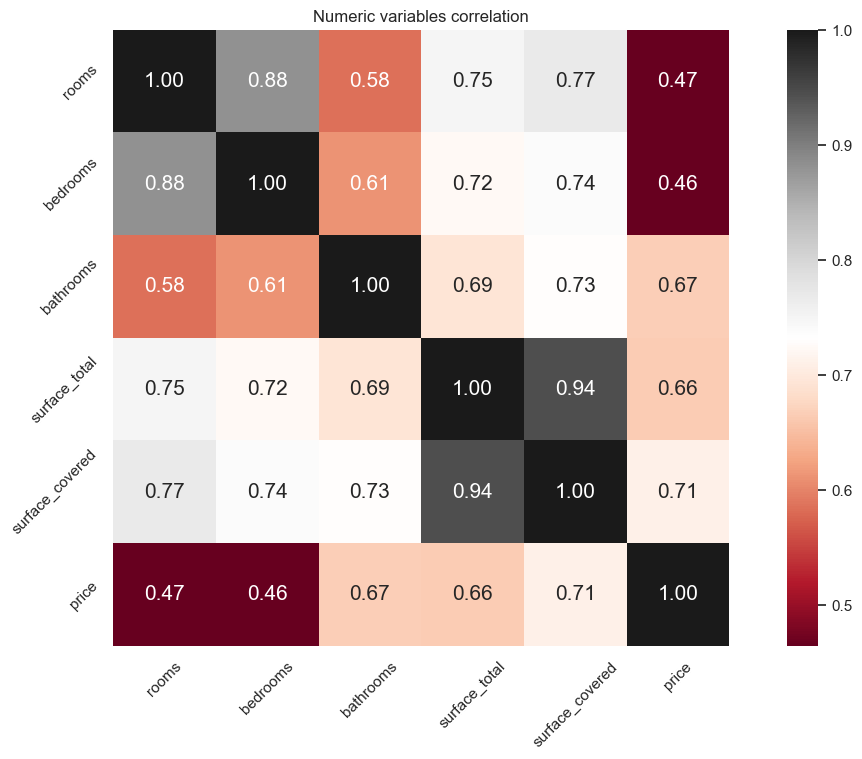

In [122]:
corr = properatiSell.drop(['property_type'], axis =1).corr()
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
            xticklabels= properatiSell.drop(['property_type','l3'], axis =1).columns,
            yticklabels= properatiSell.drop(['property_type','l3'], axis =1).columns,
            cmap= 'RdGy')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Numeric variables correlation')
plt.show()

The heatmap displays the strong positive correlation between the selected columns, being 0.46 the lowest value. And the highest values correspond to surface_covered and surface_total with a correlation of 0.94.


The next graph represents the median property price by neighbourhood

C:\Users\Mica\AppData\Local\Temp\ipykernel_17236\1568655150.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = properatiSell.groupby(['l3']).median()['price']
C:\Users\Mica\AppData\Local\Temp\ipykernel_17236\1568655150.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob" (-> color='b'). The keyword argument will take precedence.
  plt.plot(grouped.sort_values(ascending=False),'ob',color = 'burlywood')


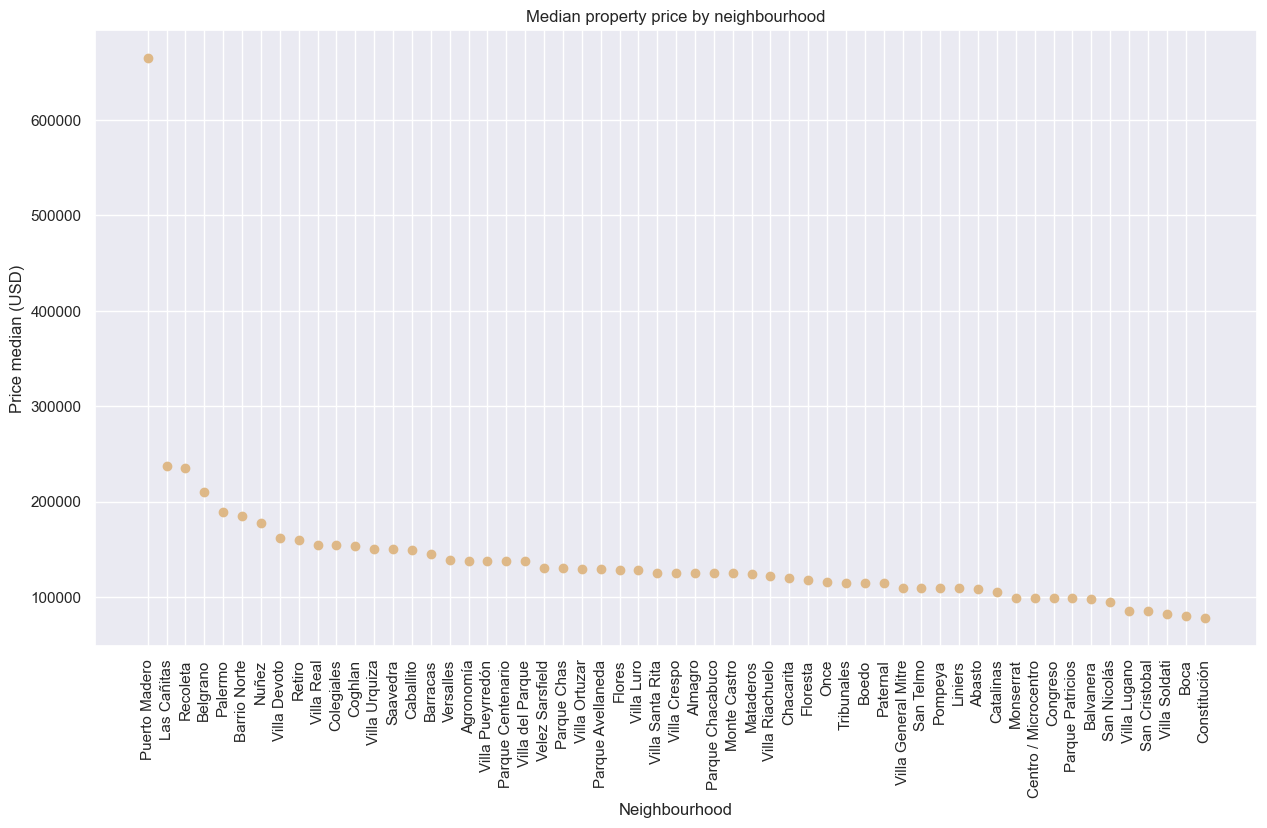

In [123]:
grouped = properatiSell.groupby(['l3']).median()['price']

plt.plot(grouped.sort_values(ascending=False),'ob',color = 'burlywood')
plt.title('Median property price by neighbourhood')
plt.ylabel('Price median (USD)')
plt.xlabel('Neighbourhood')
plt.xticks(rotation='vertical')
plt.show()

It is shown that Puerto Madero is by far the most expensive neighbourhood, followed by Las Cañitas and Recoleta in contrast to being on the lower end of the price list.

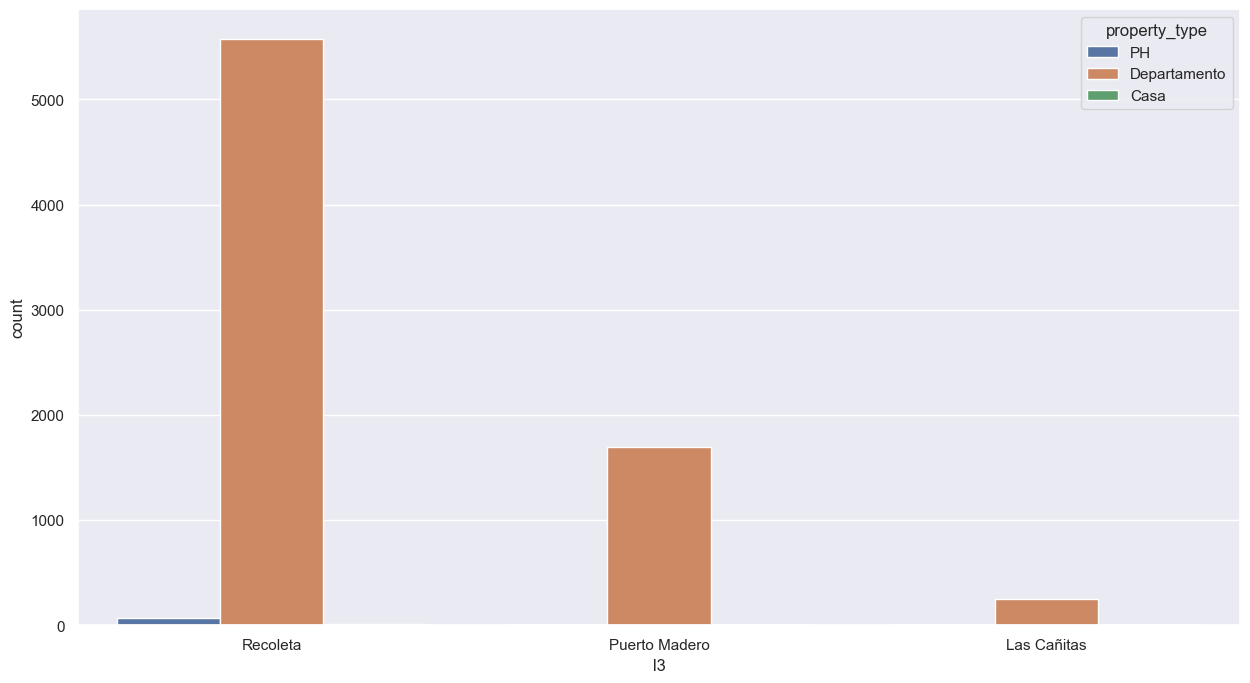

In [124]:
properati3 = properatiSell[properatiSell.l3.isin(['Puerto Madero', 'Las Cañitas', 'Recoleta'])].copy(deep=True)
properati3.head()

sns.set()
par= sns.countplot(properati3,x='l3', hue = 'property_type')
plt.show()

The plot shows that the three most expensive neighbourhoods, based on the median price of the properties, are dominated by apartments. The majority of the properties in these neighbourhoods are apartments, with a number close to 0 of houses and PHs.

## Price prediction
Price prediction is the process of using statistical or machine learning techniques to estimate the value of a property or product based on various factors such as location, size, and other relevant features. In the context of real estate, price prediction models can be used to estimate the market value of a property or to determine a competitive listing price. The accuracy of a price prediction model depends on the quality and quantity of the data used, as well as the sophistication of the algorithm employed.
The first model to be tested will be K-nearest neighbours. To predict the price the algorithm calculates the distance between the new property and all the other properties in the dataset, selects the K closest properties, and takes the average of their prices to predict the price of the new property.
K-nearest neighbours

In [125]:
#import libraries
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

#non numerical values of relevant columns are encoded
le = preprocessing.LabelEncoder()

properatiSell['l3']=le.fit_transform(properatiSell['l3'])
properatiSell['property_type']=le.fit_transform(properatiSell['property_type'])

properatiSell = properatiSell.dropna()

X = properatiSell.drop(['price'], axis = 1)
y = properatiSell.price

#data is split into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

The number of neighbors, K, is a hyperparameter that needs to be tuned to find the optimal value for the dataset, for that reason the mean squared error is calculated for a selected number of neighbors and then plotted to see easily which is the most accurate.

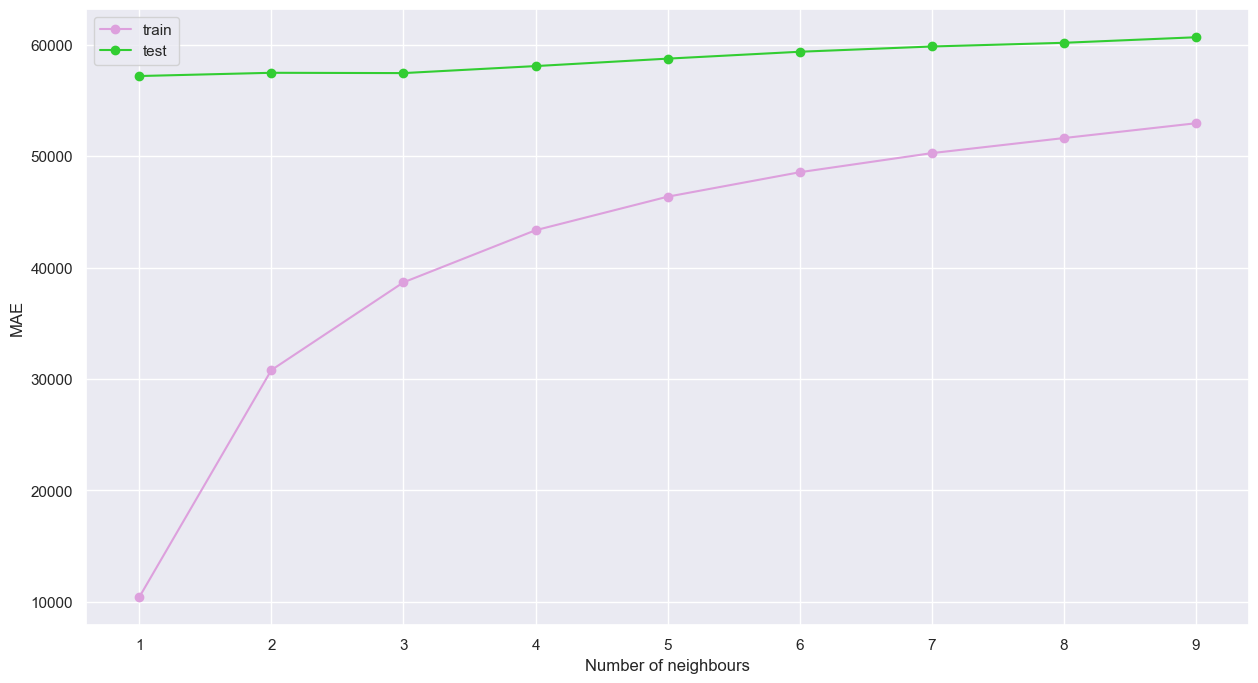

232961.47887120533

In [126]:
list_train_v = []
list_test_v = []

knn = range(1, 10)

for k in knn:

    clf = KNeighborsRegressor(k)
    clf.fit(X_train,y_train)

    y_train_pred = clf.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)


    y_test_pred = clf.predict(X_test)
    test_mae = mean_absolute_error(y_test , y_test_pred)


    list_train_v.append(train_mae)
    list_test_v.append(test_mae)

plt.plot(knn, list_train_v,'o-', label='train',color = 'plum')
plt.plot(knn, list_test_v, 'o-', label='test', color = 'limegreen' )
plt.legend()
plt.xlabel('Number of neighbours')
plt.ylabel('MAE')
plt.show()

properatiSell['price'].mean()

The mean of the test dataset being close to 60000 it means that on average, the predicted prices are off by $60000 from the actual prices. Which means that considering the mean price being 215565 the prediction is not a good enough predictor.

And now another model is used to predict the price of the properties to test against the KNNRegressor.
In the context of predicting the price of a property, Random forest is a popular machine learning algorithm that can also be used. It works by creating multiple decision trees on randomly selected subsets of the data and then averaging their predictions to reduce the risk of overfitting. In terms of performance, random forest is generally known to perform well for regression problems like price prediction, often outperforming other algorithms like linear regression and KNN.

A grid of values for the number of estimators to be tested is created:

In [127]:
n_estimators = [10, 35, 60, 85, 110]

The MAE of the random forest regressor model for each number of estimators is calculated:

In [128]:
list_train_v = []
list_test_v = []

# Loop over the range of hidden layer sizes and train a random forest regressor for each size,
# computing the MAE on the test and train set
mae_scores = []

for i in n_estimators:

    clf = regressor = RandomForestRegressor(n_estimators = i , random_state = 0)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)

    y_test_pred = clf.predict(X_test)
    test_mae = mean_absolute_error(y_test , y_test_pred)

    list_train_v.append(train_mae)
    list_test_v.append(test_mae)

The MAE is plotted as a function of the number of trees in the forest:

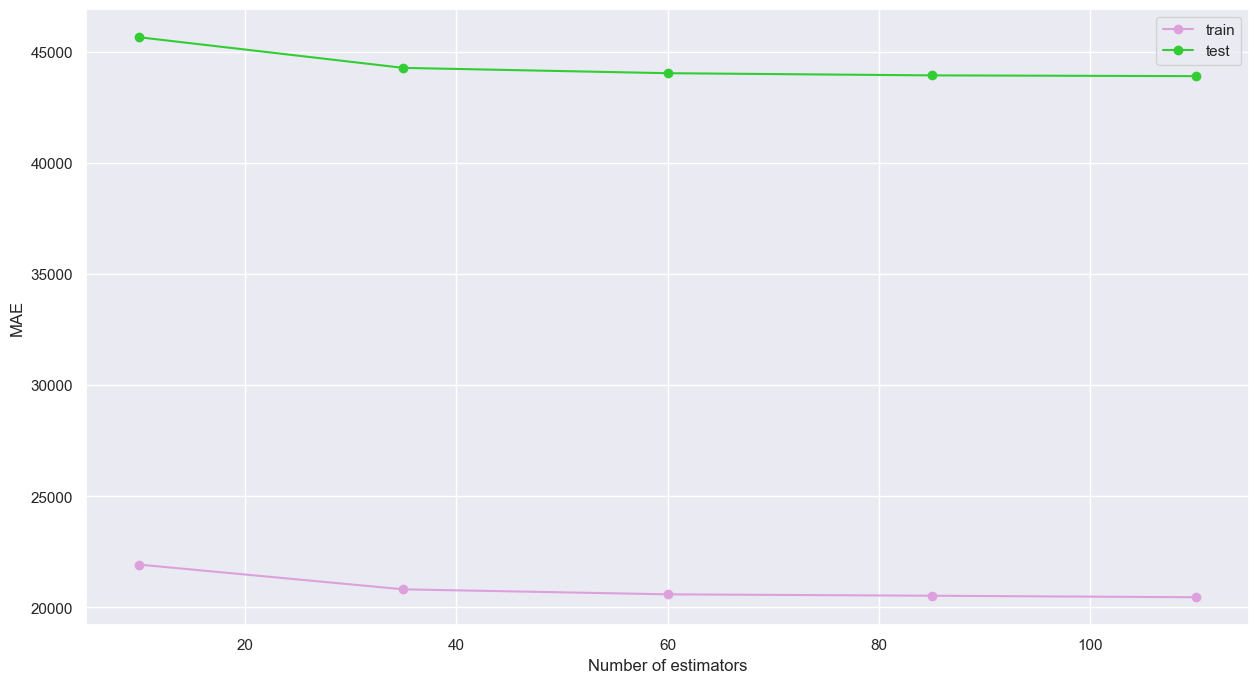

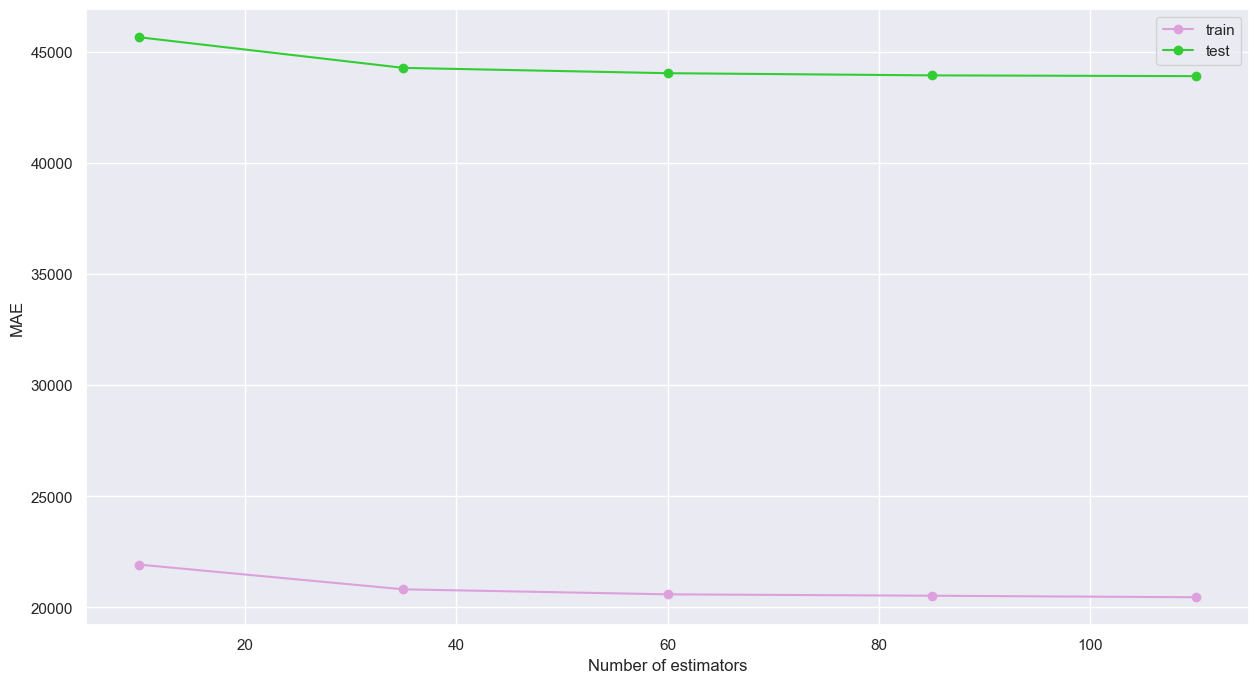

In [129]:
plt.figure()
plt.plot(n_estimators, list_train_v,'o-', label='train',color = 'plum')
plt.plot(n_estimators, list_test_v, 'o-', label='test', color = 'limegreen')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('MAE')
plt.show()


A lower MAE value indicates that the model has better accuracy in predicting the price of the property. In this case, a MAE around 45000 for the random forest model is better than a MAE close to 60000 for the KNN model.  The mean property price of 215565 serves as a benchmark to compare the MAE values. A MAE of 45000 suggests that the model can predict the price of a property with an error close to 20% on average.